In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

In [4]:
solution = pd.read_csv("C:/Users/Dani/Documents/temp/kddm2/Data/dataframe_with_outliers_3std_4.16%.csv")

In [7]:
lop = pd.read_csv("C:/Users/Dani/Documents/temp/kddm2/results_lop_val_3std_4,16%_e=2,n=10,%=0.6.csv")

In [12]:
f1_score(solution["outlier"], lop["projection"])

0.8016194331983807

In [13]:
accuracy_score(solution["outlier"], lop["projection"])

0.98285

In [14]:
precision_score(solution["outlier"], lop["projection"])

0.7725752508361204

In [69]:
loc_out_prob = pd.read_csv("Optimization_data.csv")
own_algo = pd.read_csv("own_algo.csv")
iso_forest = pd.read_csv("Iso_for.csv")

loc_out_prob_sum = loc_out_prob["sum"]
own_algo_sum = own_algo["Overall percentage"]
iso_forest.loc[:, "A":"Z"] = iso_forest.loc[:, "A":"Z"] / 100

comparison = [loc_out_prob_sum, own_algo_sum]

In [43]:
#loc_out_prob

In [44]:
#own_algo

In [56]:
#iso_forest

In [96]:
def plot_boxplots(title, columns=None, dataframe=None, data_list = None):
    if data_list is not None:
        data = data_list
    elif dataframe is not None:
        data = []
        
        for column in columns:
            data.append(dataframe[column])

    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_subplot(111)

    # Creating axes instance
    bp = ax.boxplot(data, patch_artist = True, notch ='True', vert = 0)

    colors = ["#11699E", "#F60045", "#B2B2B2", "#D9D9D9", 
    "#11699E", "#F60045", "#B2B2B2", "#D9D9D9","#11699E", 
    "#F60045", "#B2B2B2", "#D9D9D9","#11699E", "#F60045", 
    "#B2B2B2", "#D9D9D9","#11699E", "#F60045", "#B2B2B2", 
    "#D9D9D9","#11699E", "#F60045", "#B2B2B2", "#D9D9D9","#11699E", 
    "#F60045", "#B2B2B2", "#D9D9D9"]

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    # changing color and linewidth of
    # whiskers
    for whisker in bp['whiskers']:
        whisker.set(color ='black',linewidth = 1.5,linestyle =":")
    # changing color and linewidth of
    # caps
    for cap in bp['caps']:
        cap.set(color ='black',linewidth = 2)

    # changing color and linewidth of
    # medians
    for median in bp['medians']:
        median.set(color ='black',
        linewidth = 3)

    # changing style of fliers
    for flier in bp['fliers']:
        flier.set(marker ='D',
        color ='#e7298a',
        alpha = 0.5)

    # x-axis labels
    if columns is not None:
        ax.set_yticklabels(columns)

    # Adding title
    plt.title(title)

    # Removing top axes and right axes
    # ticks
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.grid(color='#DDDDDD', linestyle=':', linewidth=0.5)

    # show plot
    plt.show()
    

Local Outlier Probability

In [65]:
loc_out_prob_e = loc_out_prob.loc[loc_out_prob.e == 3, :]
columns = list(loc_out_prob.columns)[3:]

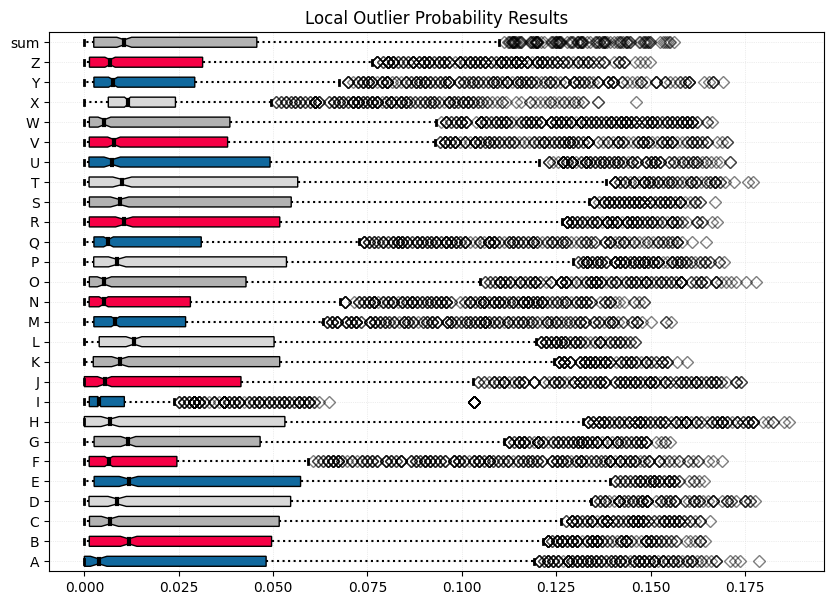

In [97]:
plot_boxplots("Local Outlier Probability Results",columns, loc_out_prob)

Own Algorithm

In [58]:
own_algo.columns

Index(['IQR', 'Start temp', 'Alpha', 'Counter', 'A', 'B', 'C', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z', 'Overall percentage'],
      dtype='object')

In [59]:
columns_own_algo = list(own_algo.columns)[4:]

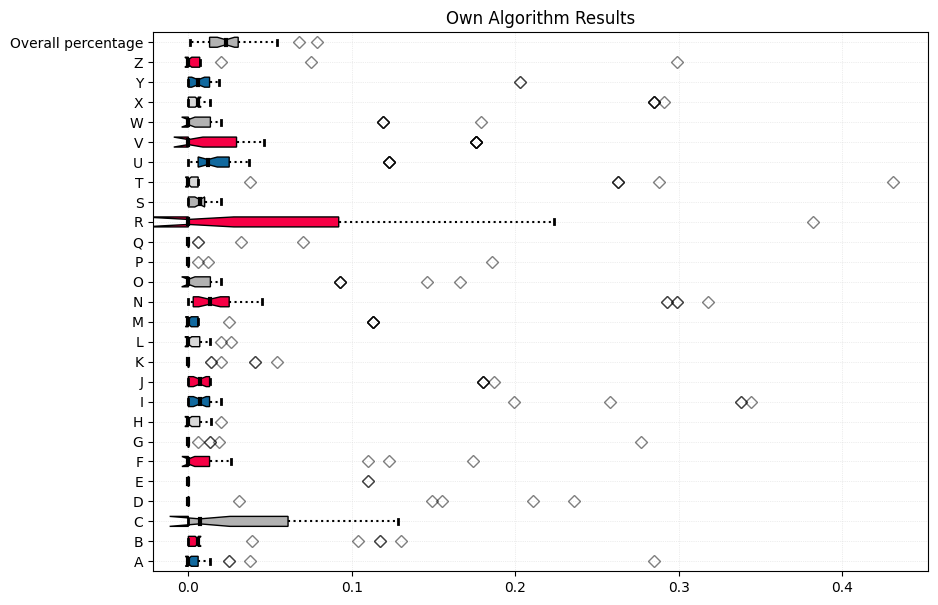

In [98]:
plot_boxplots("Own Algorithm Results",columns_own_algo, own_algo)

Isolation Forest

In [77]:
iso_forest.columns
iso_forest_colums = list(iso_forest.columns)[5:]
iso_forest =iso_forest.fillna(0)

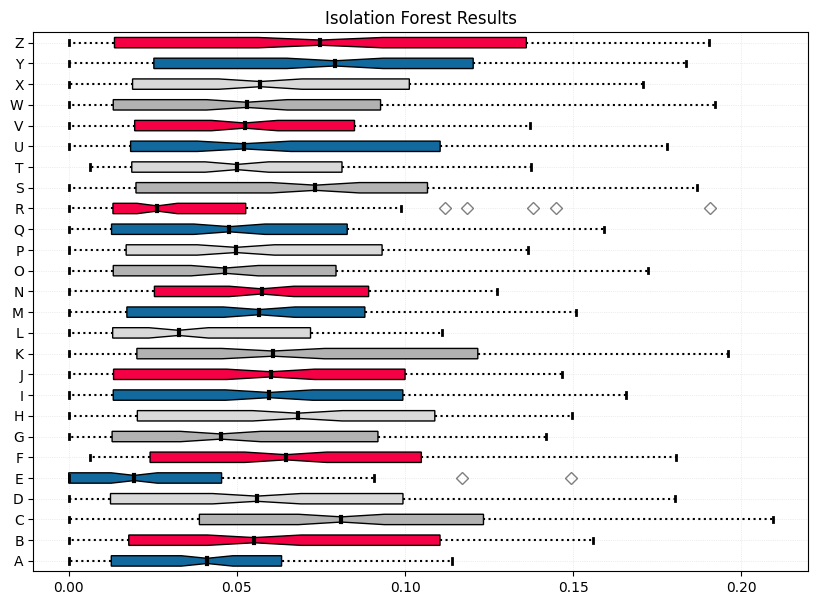

In [99]:
plot_boxplots("Isolation Forest Results", iso_forest_colums, iso_forest)

In [82]:
loc_out_prob_sum = loc_out_prob["sum"]
own_algo_sum = own_algo["Overall percentage"]

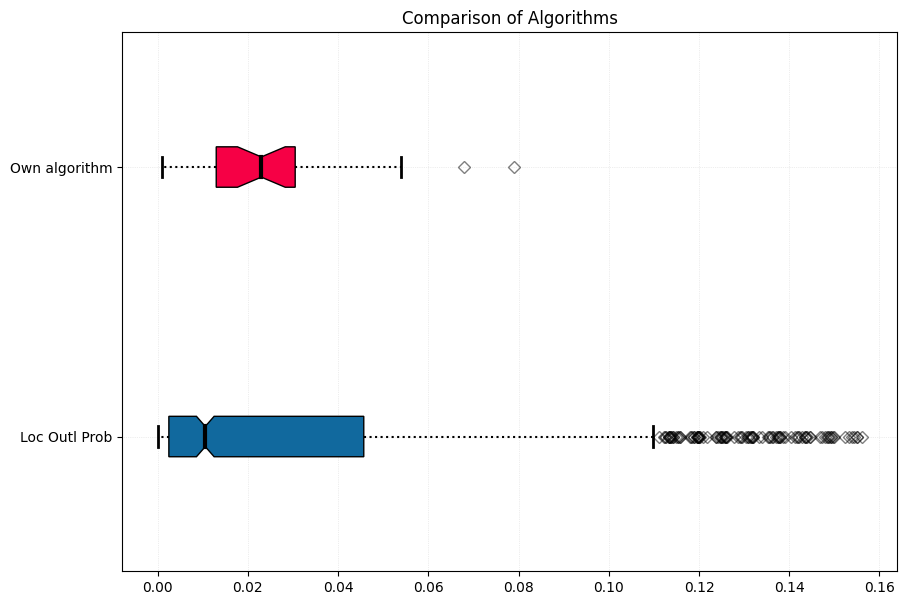

In [102]:
plot_boxplots("Comparison of Algorithms", data_list=comparison, columns=["Loc Outl Prob", "Own algorithm"])